# Imports

In [2]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Model load

In [3]:
path_qing_cheng = '../model/qing_cheng'
path_vallen = '../model/vallen'

qing_cheng_model_name = 'Qing-Cheng'
vallen_model_name = 'Vallen'

In [4]:
def get_default_file_paths(path: str):
    file_paths = []

    for dir_path, _, file_names in os.walk(path):
        file_path = {}
        
        for file_name in file_names:
            
            if file_name.endswith('.h5'):
                file_path['model'] = os.path.join(dir_path, file_name)
                
            elif file_name.endswith('x.npy'):
                file_path['x'] = os.path.join(dir_path, file_name)
                
            elif file_name.endswith('y.npy'):
                file_path['y'] = os.path.join(dir_path, file_name)
                
        if len(file_path) > 0:
            file_paths.append(file_path)

    return file_paths

In [5]:
paths_qing_cheng_default = get_default_file_paths(path_qing_cheng)
paths_vallen_default = get_default_file_paths(path_vallen)

In [6]:
def get_worst_case_file_paths(default_file_paths: list):
    worst_case_file_paths = []
    
    for index in range(0, len(default_file_paths), 4):
        worst_case_file_paths.append(
            {
                'model': default_file_paths[index]['model'],
                'x': default_file_paths[index + 2]['x'],
                'y': default_file_paths[index + 2]['y'],
            }
        )
        
        worst_case_file_paths.append(
            {
                'model': default_file_paths[index + 1]['model'],
                'x': default_file_paths[index + 3]['x'],
                'y': default_file_paths[index + 3]['y'],
            }
        )
        
    return worst_case_file_paths

In [7]:
paths_qing_cheng_worst_case = get_worst_case_file_paths(paths_qing_cheng_default)
paths_vallen_worst_case = get_worst_case_file_paths(paths_vallen_default)

In [8]:
def get_best_case_file_paths(default_file_paths: list):
    best_case_file_paths = []
    
    for index in range(0, len(default_file_paths), 4):
        best_case_file_paths.append(
            {
                'model': default_file_paths[index + 2]['model'],
                'x': default_file_paths[index]['x'],
                'y': default_file_paths[index]['y'],
            }
        )
        
        best_case_file_paths.append(
            {
                'model': default_file_paths[index + 3]['model'],
                'x': default_file_paths[index + 1]['x'],
                'y': default_file_paths[index + 1]['y'],
            }
        )
        
    return best_case_file_paths

In [9]:
paths_qing_cheng_best_case = get_best_case_file_paths(paths_qing_cheng_default)
paths_vallen_best_case = get_best_case_file_paths(paths_vallen_default)

In [10]:
def load_model_result(path_dict: dict):
    model = load_model(path_dict['model'])
    x = np.load(path_dict['x'])
    y = np.load(path_dict['y'])
    
    y_predicted = model.predict(x)
    y_predicted_classes = np.argmax(y_predicted, axis=1)
    
    return {
        'model': model, 
        'x': x, 
        'y': y, 
        'y_predicted': y_predicted, 
        'y_predicted_classes': y_predicted_classes,
    }

In [11]:
qing_cheng_default_models = [load_model_result(path) for path in paths_qing_cheng_default]
vallen_default_models = [load_model_result(path) for path in paths_vallen_default]

282/282 [==============================] - 2s 6ms/step


In [12]:
qing_cheng_worst_case_models = [load_model_result(path) for path in paths_qing_cheng_worst_case]
vallen_worst_case_models = [load_model_result(path) for path in paths_vallen_worst_case]

282/282 [==============================] - 2s 6ms/step


In [13]:
qing_cheng_best_case_models = [load_model_result(path) for path in paths_qing_cheng_best_case]
vallen_best_case_models = [load_model_result(path) for path in paths_vallen_best_case]

105/105 [==============================] - 1s 6ms/step


# Plot

In [14]:
position_class_label = ['No Leakage', 'Leakage in position 2', 'Leakage in position 3', 'Leakage in position 4']
boolean_class_label = ['No Leakage', 'Leakage']

In [15]:
def plot_confusion_matrix(model_a:dict, model_a_name: str, model_b:dict, model_b_name:str, class_labels: list[str], title:str):
    matrix_a = confusion_matrix(model_a['y'], model_a['y_predicted_classes'])
    matrix_b = confusion_matrix(model_b['y'], model_b['y_predicted_classes'])
    
    matrix_a_percent = matrix_a / matrix_a.sum(axis=1)[:, np.newaxis] * 100
    matrix_b_percent = matrix_b / matrix_b.sum(axis=1)[:, np.newaxis] * 100
    
    matrix_a_df = pd.DataFrame(matrix_a_percent, columns=class_labels, index=class_labels)
    matrix_b_df = pd.DataFrame(matrix_b_percent, columns=class_labels, index=class_labels)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    heatmap_a = sns.heatmap(matrix_a_df, annot=True, cmap='Blues', fmt='.1f', cbar=False, square=True, linewidths=0.5, ax=ax1)
    heatmap_b = sns.heatmap(matrix_b_df, annot=True, cmap='Blues', fmt='.1f', cbar=False, square=True, linewidths=0.5, ax=ax2)
    
    # Rotate x-axis labels by 45 degrees
    heatmap_a.set_xticklabels(heatmap_a.get_xticklabels(), rotation=45, ha='right')
    heatmap_b.set_xticklabels(heatmap_b.get_xticklabels(), rotation=45, ha='right')
    
    ax1.set_title(f'{model_a_name}')
    ax2.set_title(f'{model_b_name}')
    
    plt.suptitle(title, y=1.05)
    
    plt.tight_layout()
    plt.show()

In [16]:
def plot_models(models_a: list[dict], model_a_name: str, models_b: list[dict], model_b_name:str, label:list[str], title: str):
    for index in range(len(models_a)):
        plot_confusion_matrix(
            models_a[index],
            model_a_name,
            models_b[index], 
            model_b_name, 
            label, 
            title,
        )

## Default

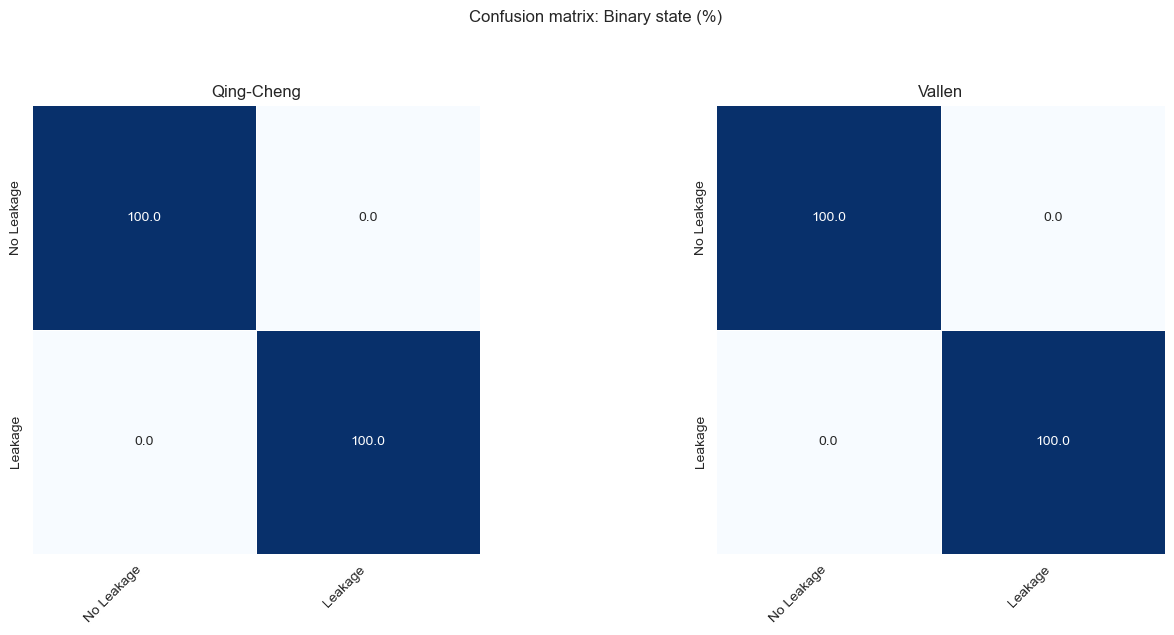

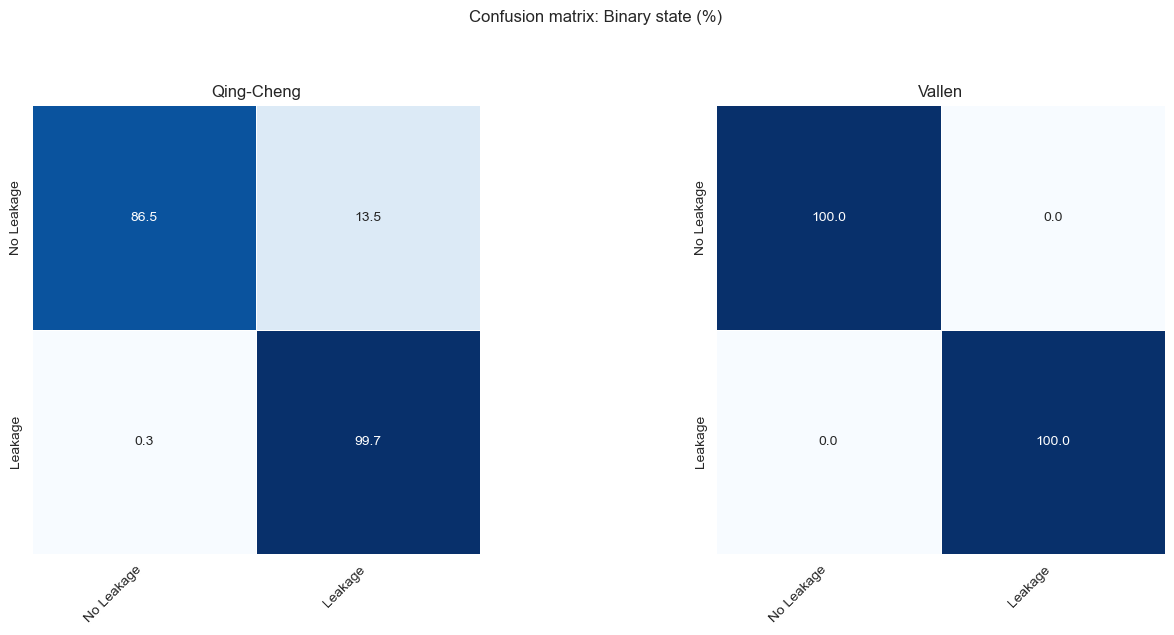

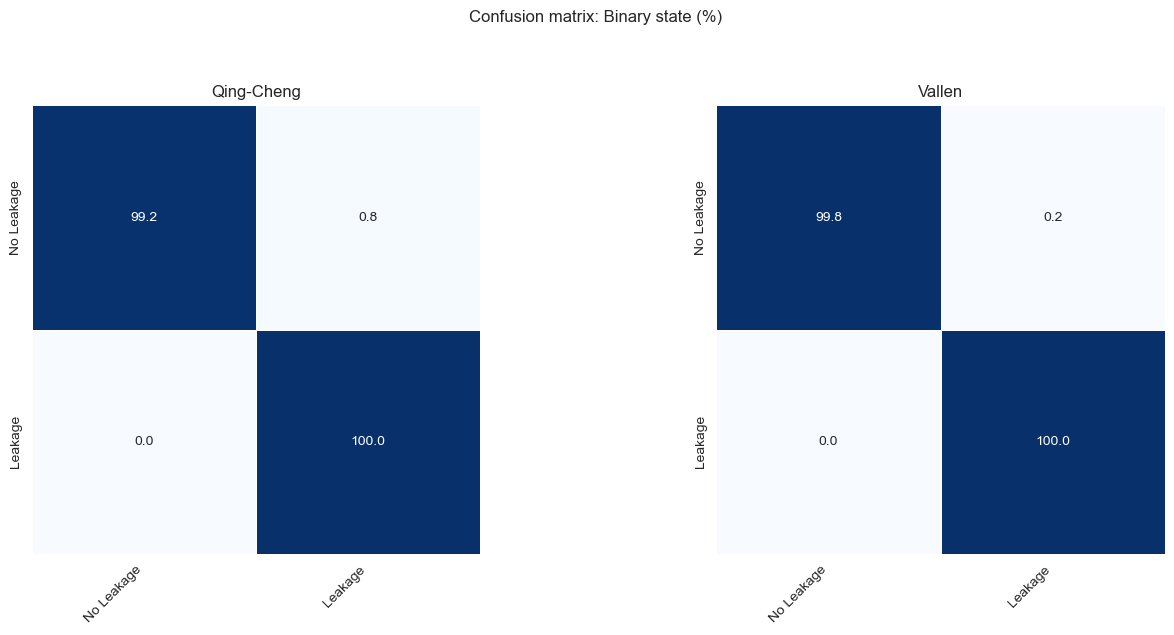

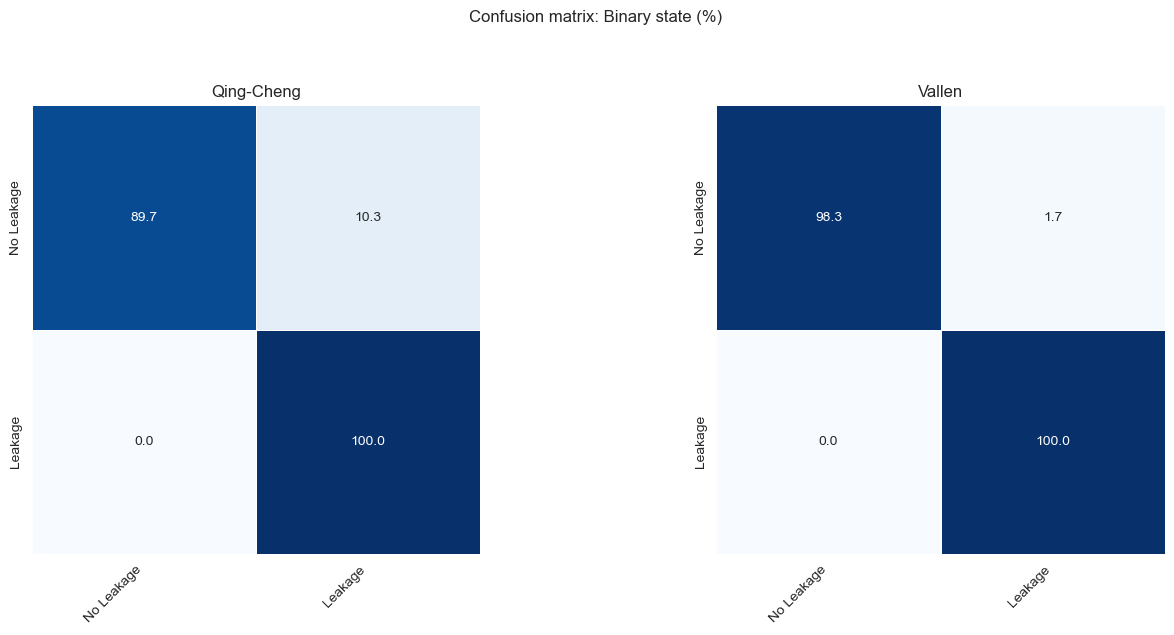

ValueError: Shape of passed values is (4, 4), indices imply (2, 2)

In [17]:
plot_models(qing_cheng_default_models[0:5], qing_cheng_model_name, vallen_default_models[0:5], vallen_model_name, boolean_class_label, 'Confusion matrix: Binary state (%)')

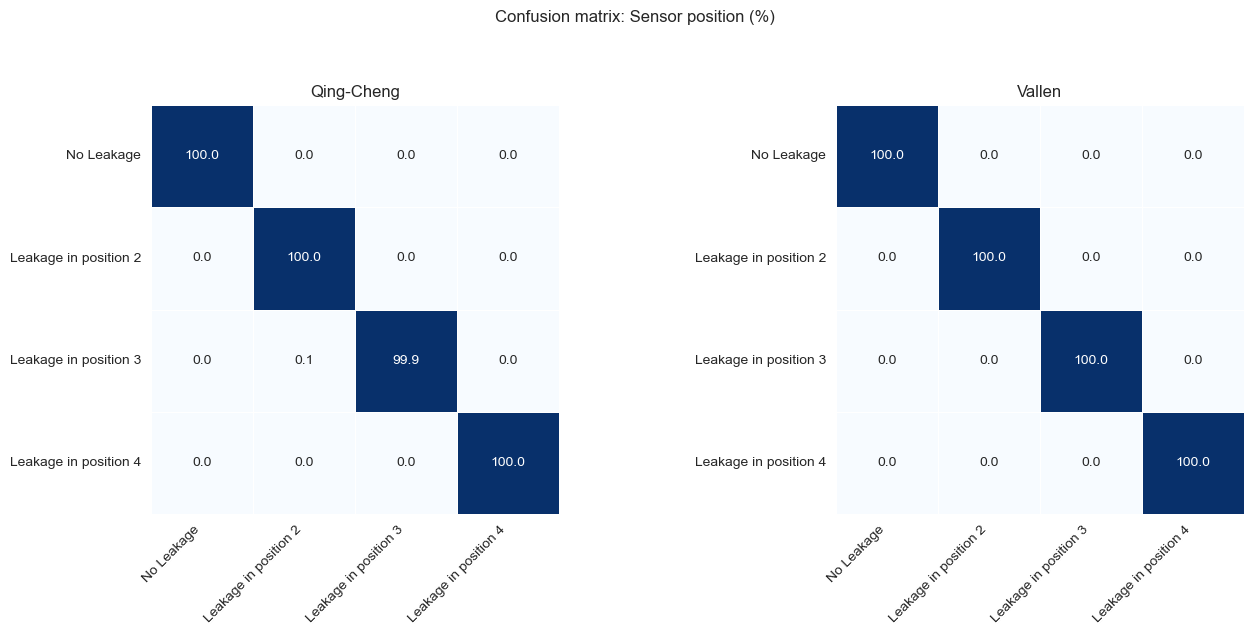

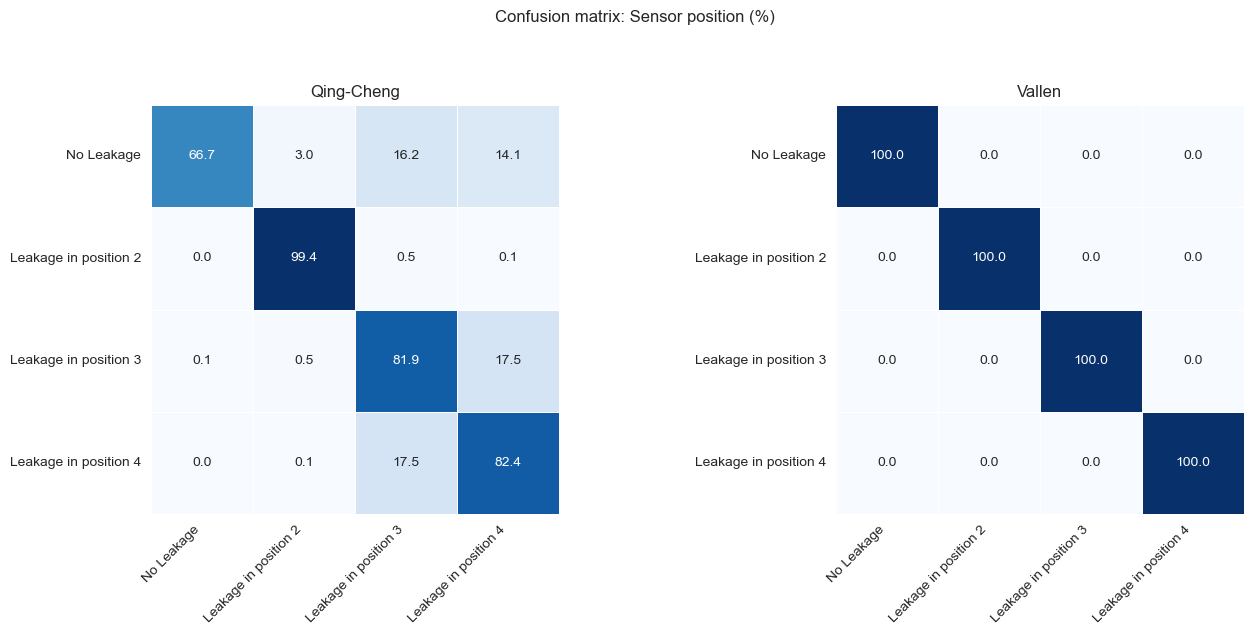

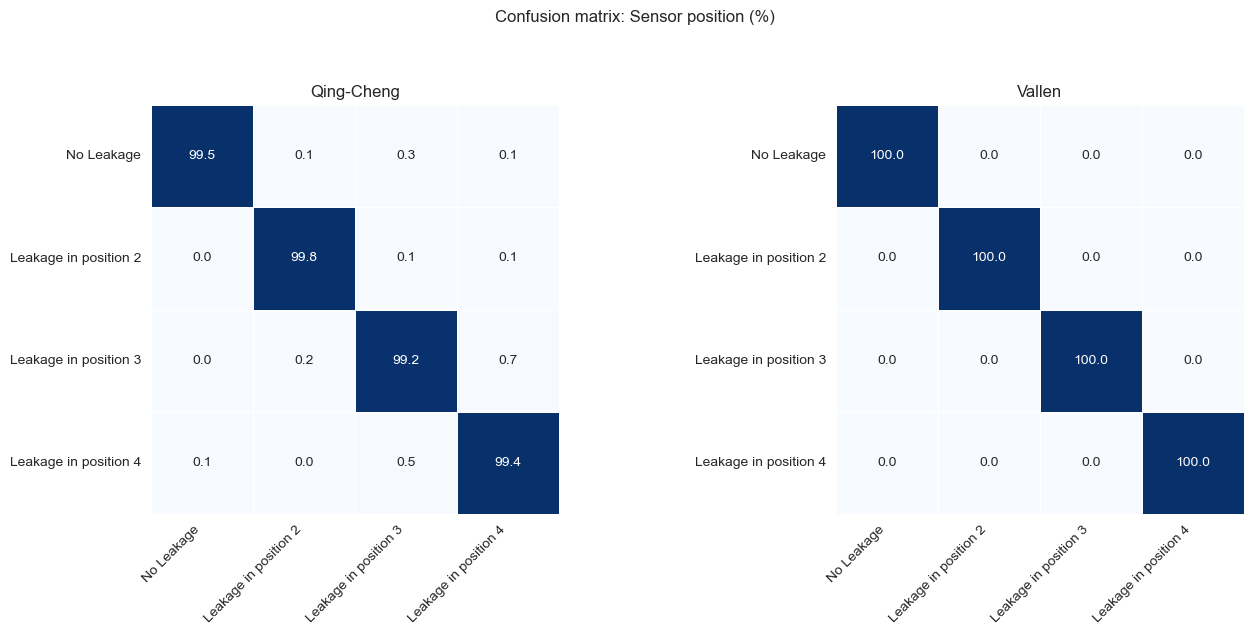

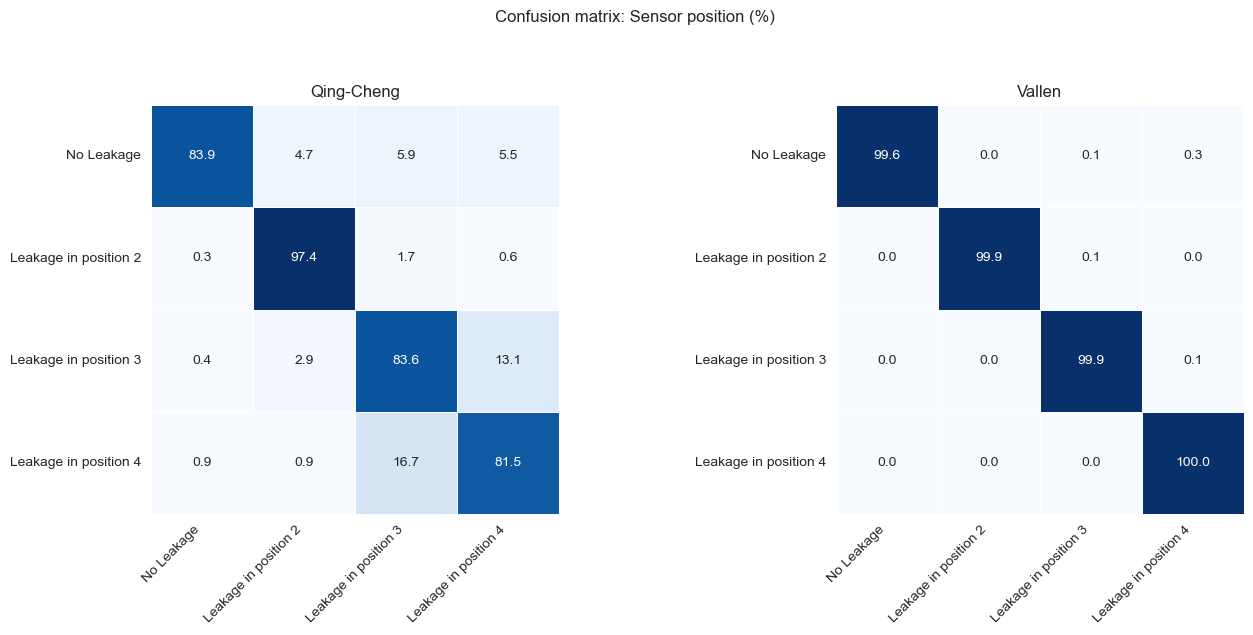

In [18]:
plot_models(qing_cheng_default_models[4:], qing_cheng_model_name, vallen_default_models[4:], vallen_model_name, position_class_label, 'Confusion matrix: Sensor position (%)')

## Worst Case

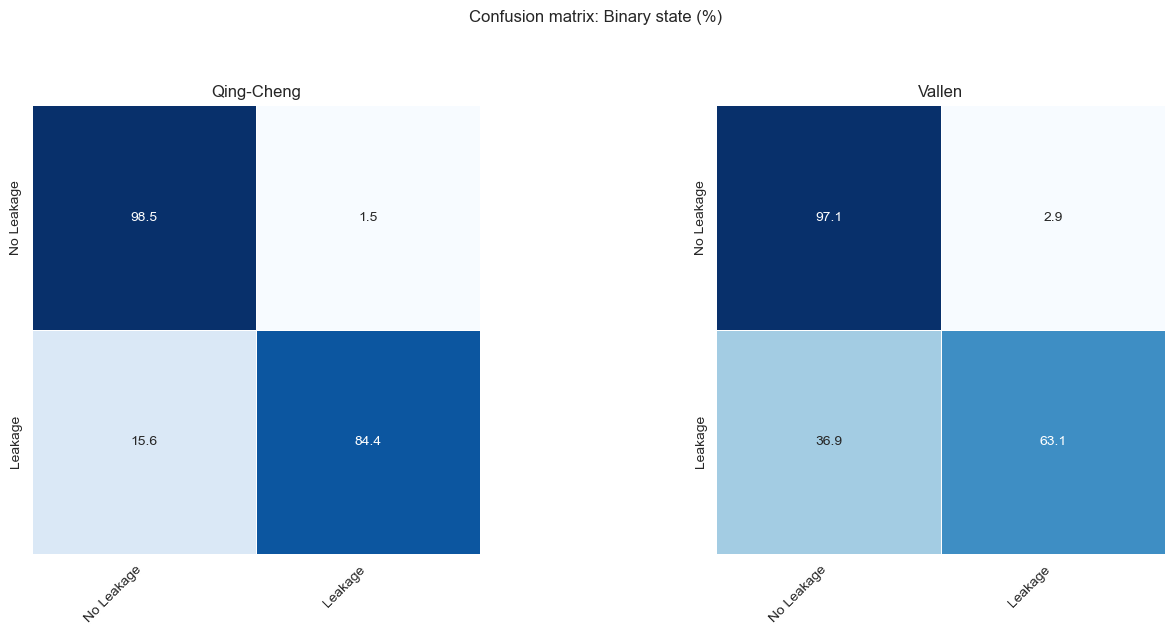

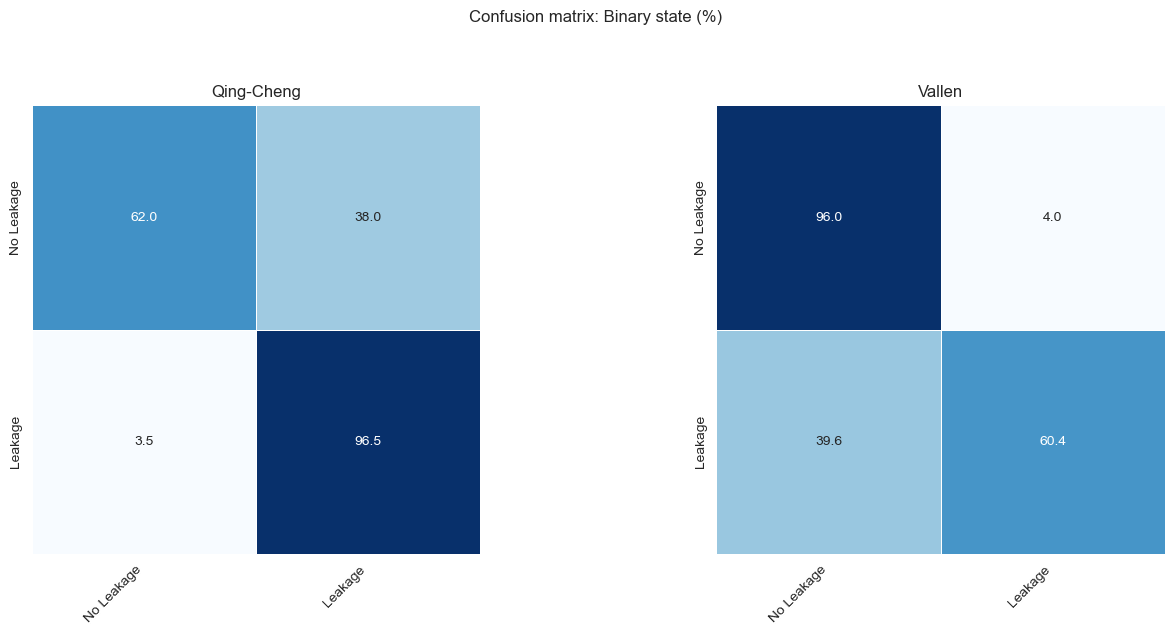

In [19]:
plot_models(qing_cheng_worst_case_models[0:2], qing_cheng_model_name, vallen_worst_case_models[0:2], vallen_model_name, boolean_class_label, 'Confusion matrix: Binary state (%)')

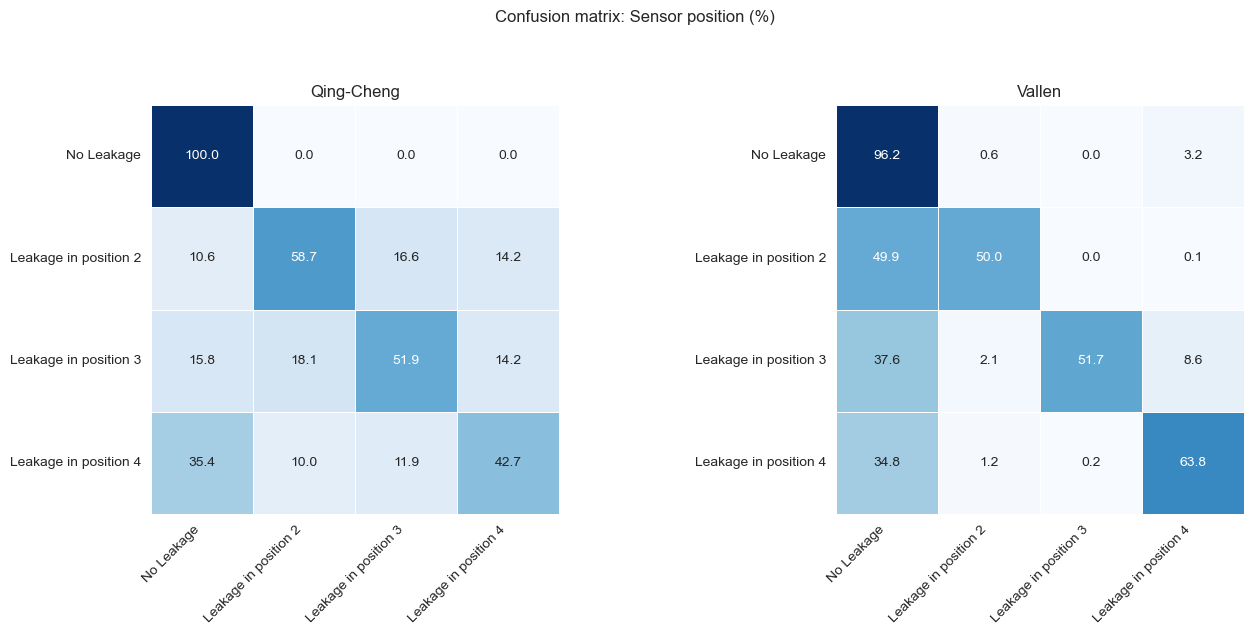

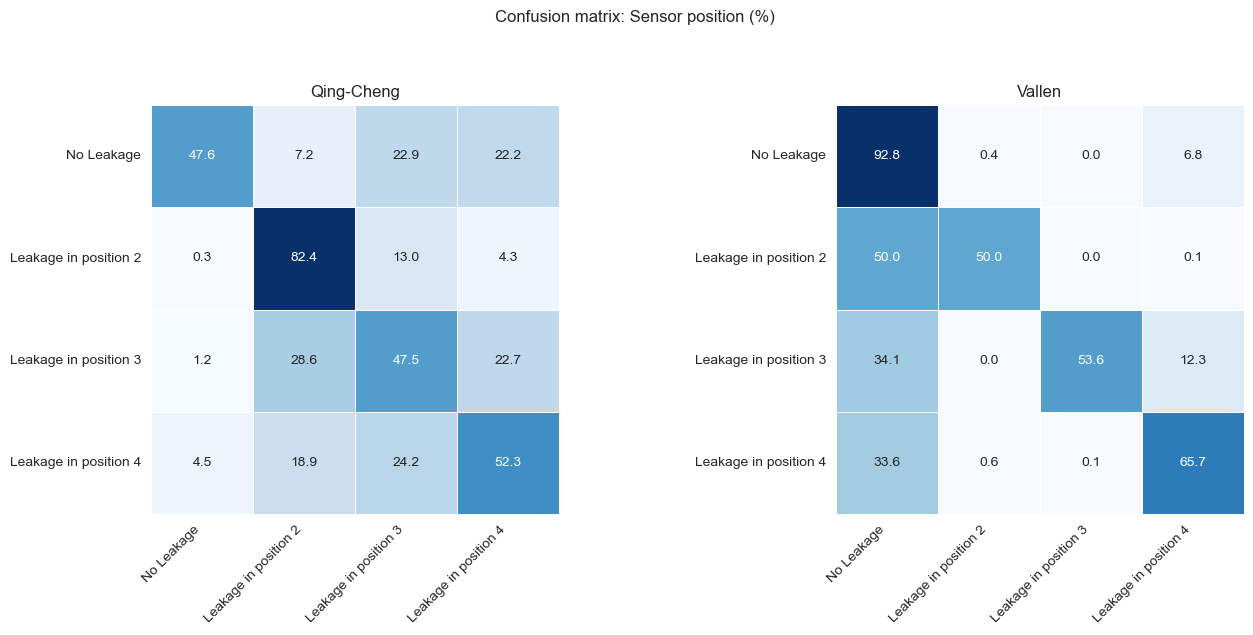

In [20]:
plot_models(qing_cheng_worst_case_models[2:], qing_cheng_model_name, vallen_worst_case_models[2:], vallen_model_name, position_class_label, 'Confusion matrix: Sensor position (%)')

## Best Case

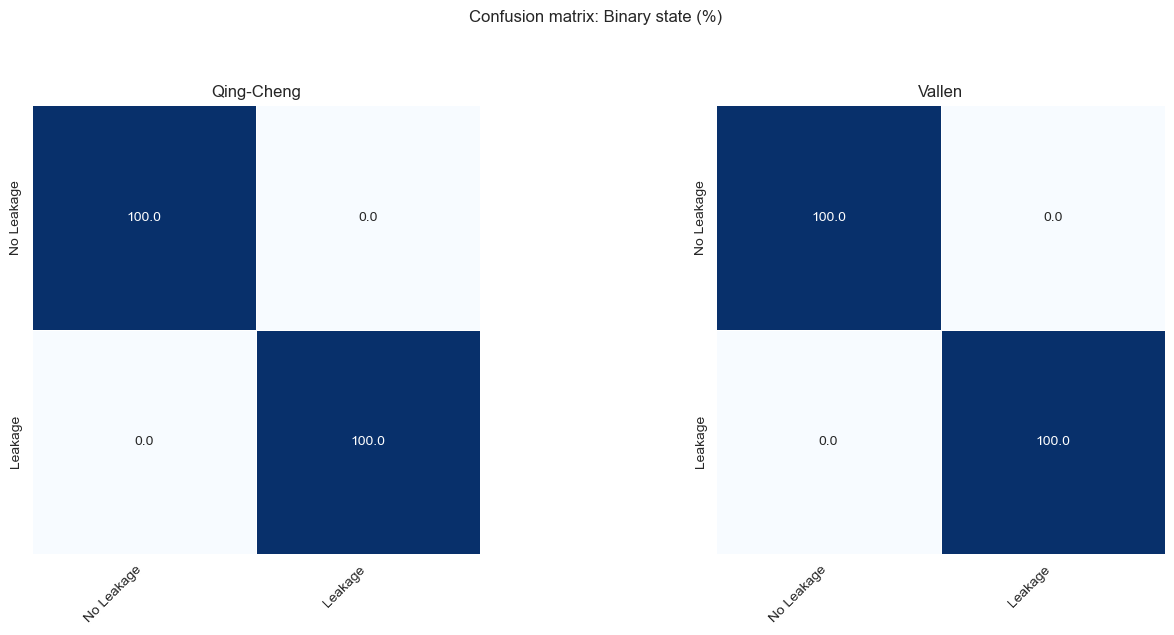

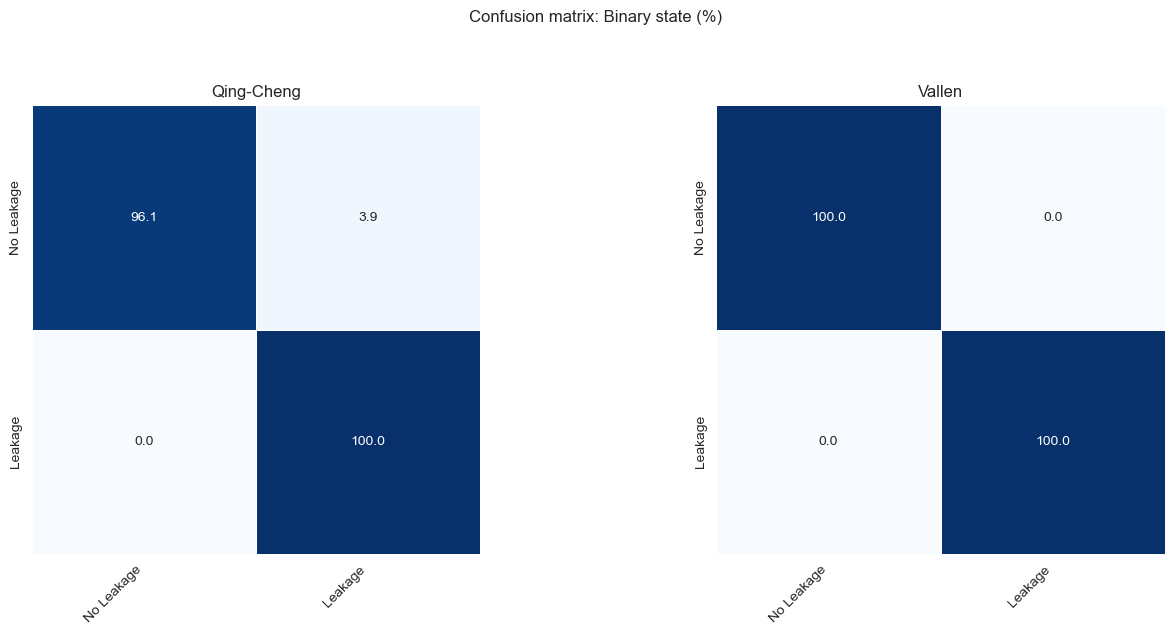

In [21]:
plot_models(qing_cheng_best_case_models[0:2], qing_cheng_model_name, vallen_best_case_models[0:2], vallen_model_name, boolean_class_label, 'Confusion matrix: Binary state (%)')

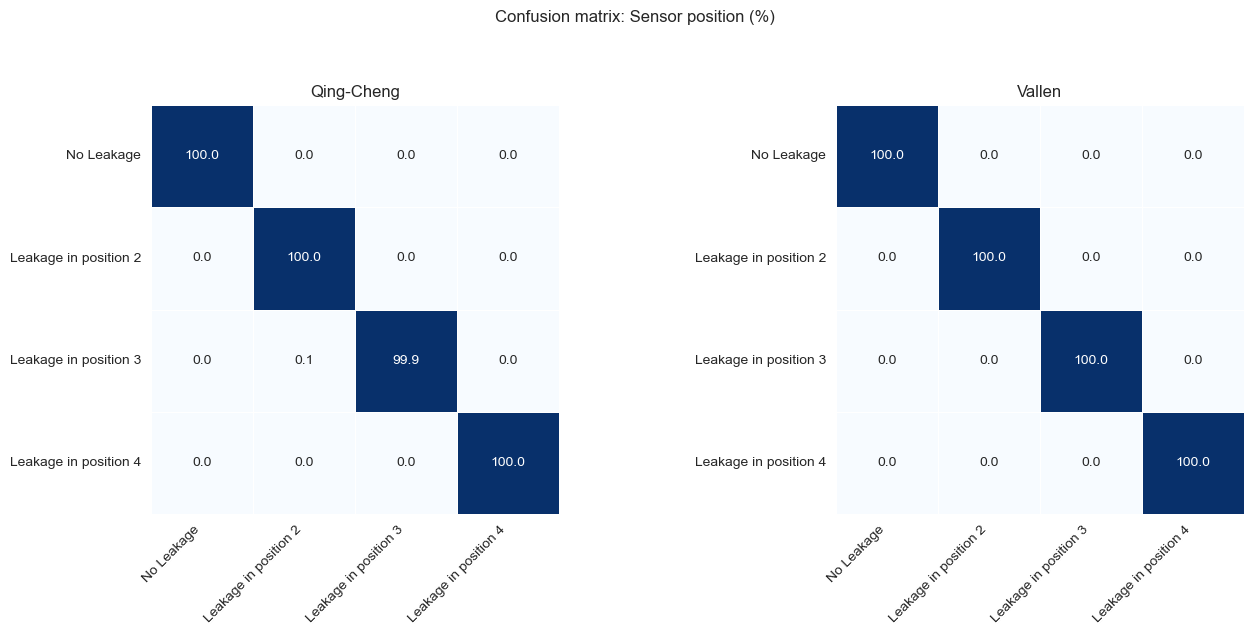

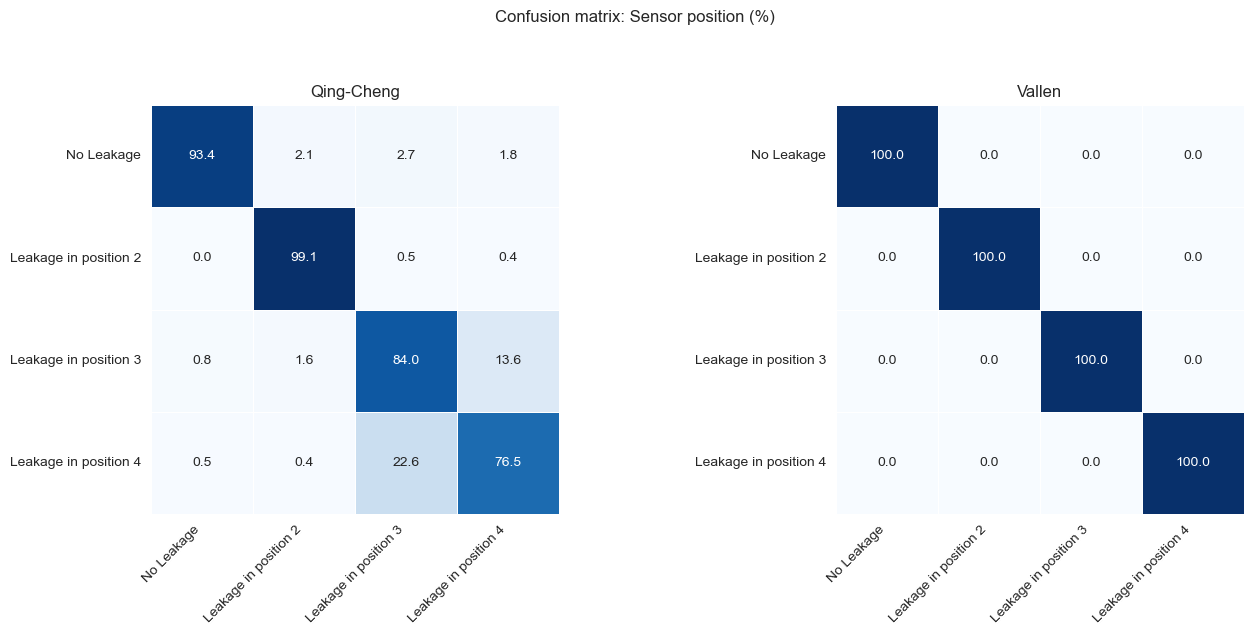

In [22]:
plot_models(qing_cheng_best_case_models[2:], qing_cheng_model_name, vallen_best_case_models[2:], vallen_model_name, position_class_label, 'Confusion matrix: Sensor position (%)')

# ---

In [ ]:
def process_boolean_models(model_result: dict):
    matrix = confusion_matrix(model_result['y'], model_result['y_predicted_classes'])
    
    matrix_percent = matrix / matrix.sum(axis=1)[:, np.newaxis] * 100
    
    model_result['confusion_matrix_default'] = matrix
    model_result['confusion_matrix_percent_default'] = matrix_percent

In [ ]:
def process_position_models(model_result: dict):
    matrix = confusion_matrix(model_result['y'], model_result['y_predicted_classes'])
    
    matrix_percent = matrix / matrix.sum(axis=1)[:, np.newaxis] * 100
    
    model_result['confusion_matrix_default'] = matrix
    model_result['confusion_matrix_percent_default'] = matrix_percent
    
    model_result['all_correct_predict_mean'] = matrix_a_percent.diagonal().mean()
    model_result['no_leakage_correct_predict_mean'] = matrix_a_percent.diagonal()[0]
    model_result['leakage_correct_predict_mean'] = matrix_a_percent.diagonal()[1:].mean()
    
    model_result['error_rate_per_column'] = ( np.sum(matrix_a_percent, axis=0) - np.diagonal(matrix_a_percent) ) / 3

In [ ]:
print(classification_report(qing_cheng_models[7]['y'], qing_cheng_models[7]['y_predicted_classes']))

In [ ]:
matrix_a = confusion_matrix(qing_cheng_models[7]['y'], qing_cheng_models[7]['y_predicted_classes'])

In [ ]:
matrix_a

In [ ]:
matrix_a_percent = matrix_a / matrix_a.sum(axis=1)[:, np.newaxis] * 100

In [ ]:
matrix_a_percent

In [ ]:
print(f'Todos acertos (%): { matrix_a_percent.diagonal().mean() }')
print('---------------------------------------------------------------------')
print(f'Acertos de normalidade (%): { matrix_a_percent.diagonal()[0] }')
print(f'Acertos de vazamento (%): { matrix_a_percent.diagonal()[1:].mean() }')

In [ ]:
print(f'Todos erros (%): { 100 - matrix_a_percent.diagonal().mean() }')
print('---------------------------------------------------------------------')
print(f'Erros de normalidade (%): { 100 - matrix_a_percent.diagonal()[0] }')
print(f'Erros de vazamento (%): { 100 - matrix_a_percent.diagonal()[1:].mean() }')

In [ ]:
error_rate_per_column = ( np.sum(matrix_a_percent, axis=0) - np.diagonal(matrix_a_percent) ) / 3
print('Error rate per column:')
print(f'\t- No Leakage (%): {error_rate_per_column[0]}')
print(f'\t- Leakage in position 2 (%): {error_rate_per_column[1]}')
print(f'\t- Leakage in position 3 (%): {error_rate_per_column[2]}')
print(f'\t- Leakage in position 4 (%): {error_rate_per_column[3]}')

In [ ]:
len(qing_cheng_models[7]['x'][0])